## Question 11  / 12 
#### a)The question 11 will bring in all the 20 categories first.
#### b)Build the TF-IDF matrix and perform SVD.
#### c)Find purity measures like Completeness,Homogeneity etc
#### d)Plot purity measures on 2 D space
#### e)Plot contingency matrix
#### f) Plot the best cluster/contingency matrix and scores
#### Repeat above steps for NMF

In [27]:
#Library for dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

#Importing the datasets
dataset = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 0)
x = dataset.data
y = dataset.target

# Remove stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
import re
pop = []
for i in range(len(x)):
    text = re.sub('[^a-zA-Z]', ' ', x[i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    pop.append(text)   
    
# TFIDF 
tfidf = TfidfVectorizer(min_df=3)
tfidf_matrix = tfidf.fit_transform(pop)
print(tfidf_matrix.shape)

#Fitting K-means and predicting the output class
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
#kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=30,max_iter=1000)
ykm0 = kmeans.fit_predict(tfidf_matrix)

#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm0))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm0))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm0))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm0))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm0))


(18846, 44866)
Homogeneity: 0.3061
Completeness: 0.3846
V-measure: 0.3409
Adjusted Rand-Index: 0.1045
Adjusted Mutual Info score: 0.3038


Current r value sweeping = 1


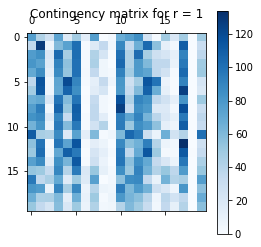

Current r value sweeping = 2


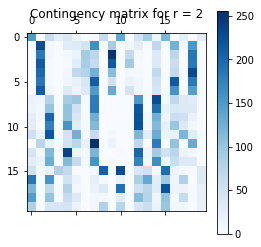

Current r value sweeping = 3


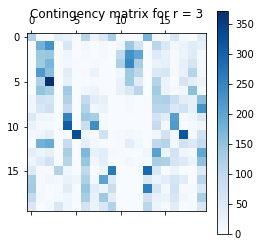

Current r value sweeping = 5


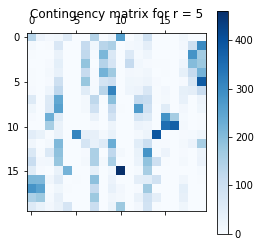

Current r value sweeping = 10


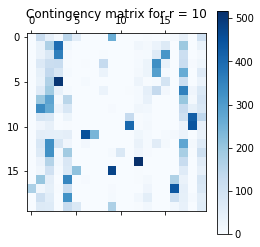

Current r value sweeping = 20


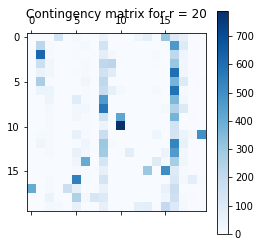

Current r value sweeping = 50


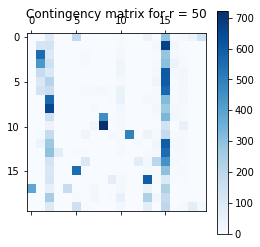

Current r value sweeping = 100


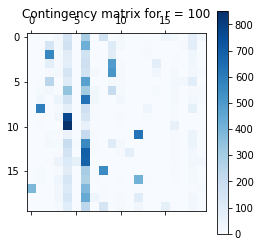

Current r value sweeping = 300


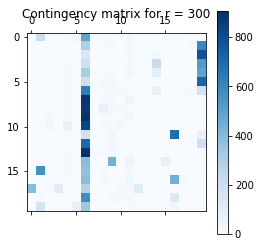

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

#dimensionality reduction
r = [1,2,3,5,10,20,50,100,300]

#Metric buckets
cont_matrix = []
homogenity = []
completeness = []
vmeasure = [] 
adjrand = []
adjmutualinfo = []

for iter in r:
    print('Current r value sweeping = %d' %iter)
# SVD dim reduction
    svd = TruncatedSVD(n_components = iter, random_state = 0)
    feature_mat = svd.fit_transform(tfidf_matrix)
# K means based on SVD dim reduction
    kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
    ykm = kmeans.fit_predict(feature_mat)
# Conf Matrix ( y= dataset.target)
    mat = confusion_matrix(y, ykm)  
    cont_matrix.append(mat)
# Plots 
    plt.matshow(mat,cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Contingency matrix for r = %d' %iter)
    plt.show()
#http://scikit-learn.org/stable/auto_examples/text/document_clustering.html   
    homogenity.append(metrics.homogeneity_score(y, ykm))
    completeness.append(metrics.completeness_score(y, ykm))
    vmeasure.append(metrics.v_measure_score(y, ykm))
    adjrand.append(metrics.adjusted_rand_score(y, ykm))
    adjmutualinfo.append(metrics.adjusted_mutual_info_score(y, ykm))


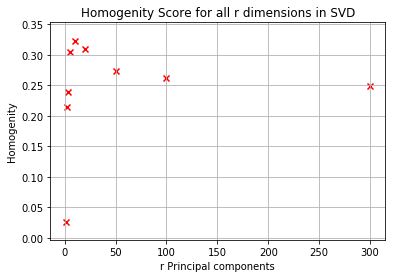

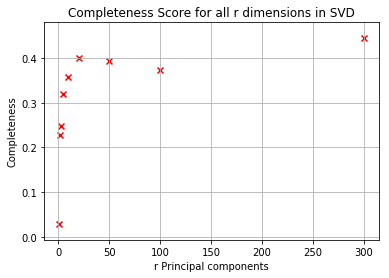

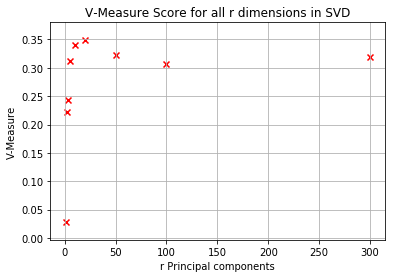

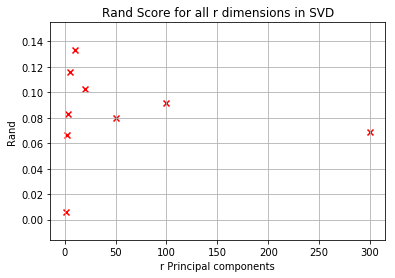

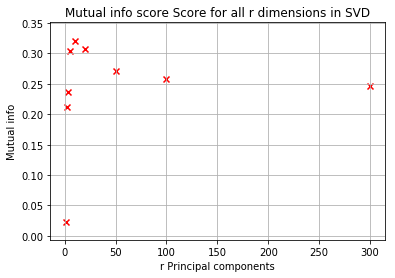

In [29]:
#Plot metrics
#plot the homogenity score
sp = plt.scatter(x= r,y= homogenity,color='r',marker='x')
plt.ylabel('Homogenity')
plt.xlabel('r Principal components')
plt.title('Homogenity Score for all r dimensions in SVD')
plt.grid(True)
plt.show()
#plot the completeness score
plt.scatter(x= r,y= completeness,color='r',marker='x')
plt.ylabel('Completeness')
plt.xlabel('r Principal components')
plt.title('Completeness Score for all r dimensions in SVD')
plt.grid(True)
plt.show()
#plot vmeasure score
plt.scatter(x= r,y= vmeasure,color='r',marker='x')
plt.ylabel('V-Measure')
plt.xlabel('r Principal components')
plt.title('V-Measure Score for all r dimensions in SVD')
plt.grid(True)
plt.show()
#plot rand score
plt.scatter(x= r,y= adjrand,color='r',marker='x')
plt.ylabel('Rand')
plt.xlabel('r Principal components')
plt.title('Rand Score for all r dimensions in SVD')
plt.grid(True)
plt.show()
#plot mutual information score
plt.scatter(x= r,y= adjmutualinfo,color='r',marker='x')
plt.ylabel('Mutual info')
plt.xlabel('r Principal components')
plt.title('Mutual info score Score for all r dimensions in SVD')
plt.grid(True)
plt.show()



[[0.02663329718753053, 0.21483281644197494, 0.2388180802300943, 0.30550222960573875, 0.3233213399562459, 0.30881749253005325, 0.2730052280099975, 0.26128291894743844, 0.24960910069177292], [0.029149146763849578, 0.2284204788482215, 0.24753669762056218, 0.32035864564854644, 0.35876581000597424, 0.4011741171174397, 0.3926062469548659, 0.373602812403354, 0.44433068677067156], [0.027834488184175096, 0.22141838684745965, 0.2430992419710233, 0.31275411002274706, 0.3401226439408642, 0.3489888703830632, 0.32206042713948285, 0.30750740970042356, 0.3196501631363441], [0.005737987215257272, 0.06670360877175008, 0.08300379965152914, 0.11627151860354183, 0.133288650264239, 0.10216012980383786, 0.07990337707372547, 0.09127371707641825, 0.06868365839452802], [0.023578093754046826, 0.2122905509391376, 0.23635858294473386, 0.30325749714868006, 0.3211231536084469, 0.306557412854568, 0.2706160355139984, 0.2588341081718558, 0.24710516871454014]]
Optimal/Best r value :  10


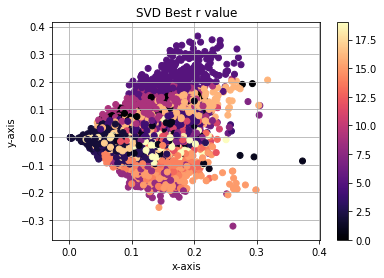

In [30]:
import numpy as np
# The below code finds the best r value
metrics = [homogenity,completeness,vmeasure,adjrand,adjmutualinfo]
print (metrics)
count_max = [np.argmax(z) for z in metrics]
bestr = r[max(set(count_max), key=count_max.count)]
print('Optimal/Best r value : ', bestr)
# The below does the k means
svd = TruncatedSVD(n_components = bestr, random_state = 0)
opt_matrix = svd.fit_transform(tfidf_matrix)
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
opt_kmeans = kmeans.fit_predict(opt_matrix)  
# The below code does SVD and plot
svd = TruncatedSVD(n_components = 2, random_state = 0)
two_dimmat = svd.fit_transform(tfidf_matrix)
# The below code plots
plt.scatter(two_dimmat[:,0],two_dimmat[:,1],c = opt_kmeans,cmap = 'magma')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('SVD Best r value')
plt.grid(True)
plt.colorbar()
plt.show()


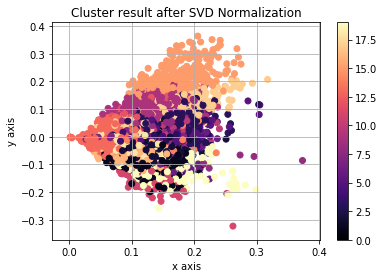

Metrics post SVD 

Homogeneity: 0.2995
Completeness: 0.3397
V-measure: 0.3183
Adjusted Rand-Index: 0.1127
Adjusted Mutual Info score: 0.2972


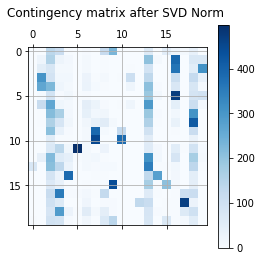

In [31]:
# The below code does normalize and prints the metrics and cluster after normalization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scal_matrix = scaler.fit_transform(opt_matrix)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=10)
ykm1 = kmeans.fit_predict(scal_matrix)  

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm1,cmap='magma')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cluster result after SVD Normalization')
plt.grid(True)
plt.colorbar()
plt.show()

#Metrics
print('Metrics post SVD \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm1))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm1))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm1))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm1))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm1))
plt.matshow(confusion_matrix(y, ykm1),cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(True)
plt.title('Contingency matrix after SVD Norm \n')
plt.show()

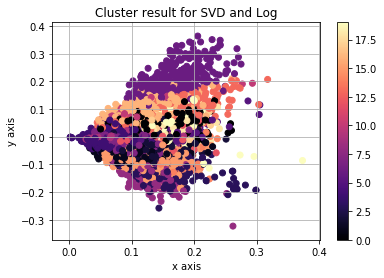

Metrics post SVD and Log 

Homogeneity: 0.3328
Completeness: 0.3758
V-measure: 0.3530
Adjusted Rand-Index: 0.1335
Adjusted Mutual Info score: 0.3307


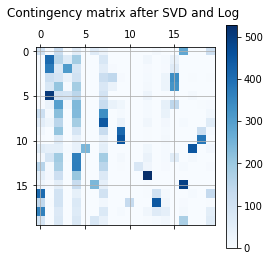

In [32]:
# # The below code does SVD + Log
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

optlog_matrix = np.log1p(opt_matrix)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm2 = kmeans.fit_predict(optlog_matrix) 

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm2,cmap='magma')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cluster result for SVD and Log')
plt.grid(True)
plt.colorbar()
plt.show()

#Metrics
print('Metrics post SVD and Log \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm2))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm2))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm2))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm2))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm2))
plt.matshow(confusion_matrix(y, ykm2),cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(True)
plt.title('Contingency matrix after SVD and Log \n')
plt.show()

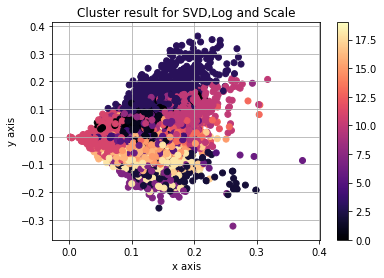

Metrics post SVD,Log and Scale 

Homogeneity: 0.3036
Completeness: 0.3459
V-measure: 0.3233
Adjusted Rand-Index: 0.1183
Adjusted Mutual Info score: 0.3013


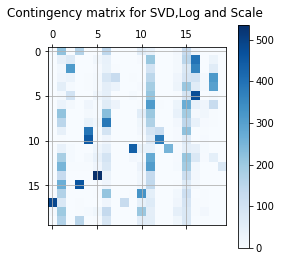

In [33]:
# # The below code does SVD + Log + Scale
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

optlog_matrix = np.log1p(opt_matrix)
optimizer = StandardScaler()
scal_matrix = scaler.fit_transform(optlog_matrix)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm3 = kmeans.fit_predict(scal_matrix) 

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm3,cmap='magma')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cluster result for SVD,Log and Scale')
plt.grid(True)
plt.colorbar()
plt.show()

#Metrics
print('Metrics post SVD,Log and Scale \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm3))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm3))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm3))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm3))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm3))
plt.matshow(confusion_matrix(y, ykm3),cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(True)
plt.title('Contingency matrix for SVD,Log and Scale \n')
plt.show()

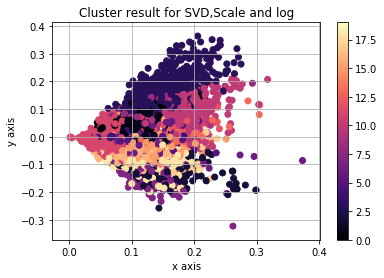

Metrics post SVD,Scale and log 

Homogeneity: 0.3026
Completeness: 0.3438
V-measure: 0.3219
Adjusted Rand-Index: 0.1192
Adjusted Mutual Info score: 0.3003


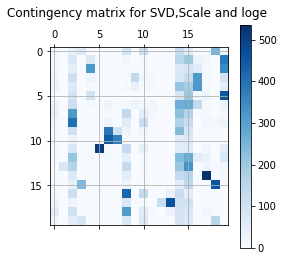

In [36]:
# # The below code does SVD + Scale + log
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

optimizer = StandardScaler()
optscaled_mat = optimizer.fit_transform(opt_matrix)
optscaled_mat -= optscaled_mat.min()
optlog_mat = np.log1p(optscaled_mat)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm4 = kmeans.fit_predict(optlog_mat) 

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm3,cmap='magma')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cluster result for SVD,Scale and log')
plt.grid(True)
plt.colorbar()
plt.show()

#Metrics
print('Metrics post SVD,Scale and log \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm4))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm4))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm4))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm4))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm4))
plt.matshow(confusion_matrix(y, ykm4),cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(True)
plt.title('Contingency matrix for SVD,Scale and loge \n')
plt.show()